## Car Sale Process
### Process is described by the following Petri Net based diagram where flashes are tokens.

![Process Diagram](PN1.png)

### Modules must be imported first:

In [1]:
from petrinet import PetriNet, P_PetriNet
from place import Place
from transition import Transition, P_Transition
from petrinetgraph import GPlace, GTransition, PetriNetGraph
import time
import random

### PetriNet is initialized and places from diagram defined.
Every place is instantiated with its name and number of tokens. Two places were added to enable alternative flow for Car selection and Get financing. In case that customer does not succeed he/she leaves the process.

In [2]:
pn = P_PetriNet()

p00 = Place("Customer", 1)
p01 = Place("Customer")
p02 = Place("Customer")
p03 = Place("Customer")
p04 = Place("Customer")
p05 = Place("Customer")
pn.add_place(p00)
pn.add_place(p01)
pn.add_place(p02)
pn.add_place(p03)

p10 = Place("Salesman", 1)
p11 = Place("Salesman")
p12 = Place("Salesman")
p13 = Place("Salesman")
pn.add_place(p10)
pn.add_place(p11)
pn.add_place(p12)
pn.add_place(p13)

p20 = Place("Order")
p21 = Place("Order")
pn.add_place(p20)
pn.add_place(p21)

p40 = Place("Accountant", 1)
p50 = Place("Financing")
p60 = Place("Car")
p70 = Place("Protocol")
pn.add_place(p40)
pn.add_place(p50)
pn.add_place(p60)
pn.add_place(p70)

print("Set of places: ")
for place in pn.places:
    place.print()

Set of places: 
Place Customer has 1 token(s)
Place Customer has 0 token(s)
Place Customer has 0 token(s)
Place Customer has 0 token(s)
Place Salesman has 1 token(s)
Place Salesman has 0 token(s)
Place Salesman has 0 token(s)
Place Salesman has 0 token(s)
Place Order has 0 token(s)
Place Order has 0 token(s)
Place Accountant has 1 token(s)
Place Financing has 0 token(s)
Place Car has 0 token(s)
Place Protocol has 0 token(s)


### Transitions (activities) are defined.
Every transition is defined by its name, input places, output places and callback function that is executed when the transition is fired. Output places can be divided to set of places which are dedicated to two scenarios: transition was successful or not.

Callback function writes info about transition being executed. Every callback function should return true or false based on the fact, that its execution was successful. The bellow case shows the random result where success has a probability 80%.

In [3]:
def transition_fired(transition_name: str) -> bool:
    pause = random.uniform(1,3)
    print(f"Transition {transition_name} started.")
    time.sleep(pause)
    print(f"Transition {transition_name} finished after {round(pause, 2)} seconds.")
    result = random.choice([True, True, True, True, False])
    print(f"Transition result was {result}.")
    return result

car_selection = P_Transition("Car selection", [p00, p10], ([p01, p11, p20, p21],[p04]),transition_fired)
car_ordering = P_Transition("Car ordering", [p11, p21], [p12, p60], transition_fired)
get_financing = P_Transition("Get financing", [p01, p20], ([p02, p50], [p05]), transition_fired)
checking_payment = P_Transition("Checking payment", [p02, p12, p40, p50], [p13, p03], transition_fired)
car_hand_over = P_Transition("Car hand over", [p13, p03, p60], [p70], transition_fired)

pn.add_transition(checking_payment)
pn.add_transition(car_hand_over)
pn.add_transition(car_selection)
pn.add_transition(car_ordering)
pn.add_transition(get_financing)

print("Set of transitions: ")
for transition in pn.transitions:
    transition.print()

Set of transitions: 
Transition: Checking payment
Input Places: 
Place Customer has 0 token(s)
Place Salesman has 0 token(s)
Place Accountant has 1 token(s)
Place Financing has 0 token(s)
Output Places: 
Place Salesman has 0 token(s)
Place Customer has 0 token(s)
Transition: Car hand over
Input Places: 
Place Salesman has 0 token(s)
Place Customer has 0 token(s)
Place Car has 0 token(s)
Output Places: 
Place Protocol has 0 token(s)
Transition: Car selection
Input Places: 
Place Customer has 1 token(s)
Place Salesman has 1 token(s)
Output Places: 
Place Order has 0 token(s)
Place Customer has 0 token(s)
Place Order has 0 token(s)
Place Customer has 0 token(s)
Place Salesman has 0 token(s)
Transition: Car ordering
Input Places: 
Place Salesman has 0 token(s)
Place Order has 0 token(s)
Output Places: 
Place Car has 0 token(s)
Place Salesman has 0 token(s)
Transition: Get financing
Input Places: 
Place Customer has 0 token(s)
Place Order has 0 token(s)
Output Places: 
Place Customer has 0 

### To verify the Petri Net specification for the given process the directed graph can be generated.

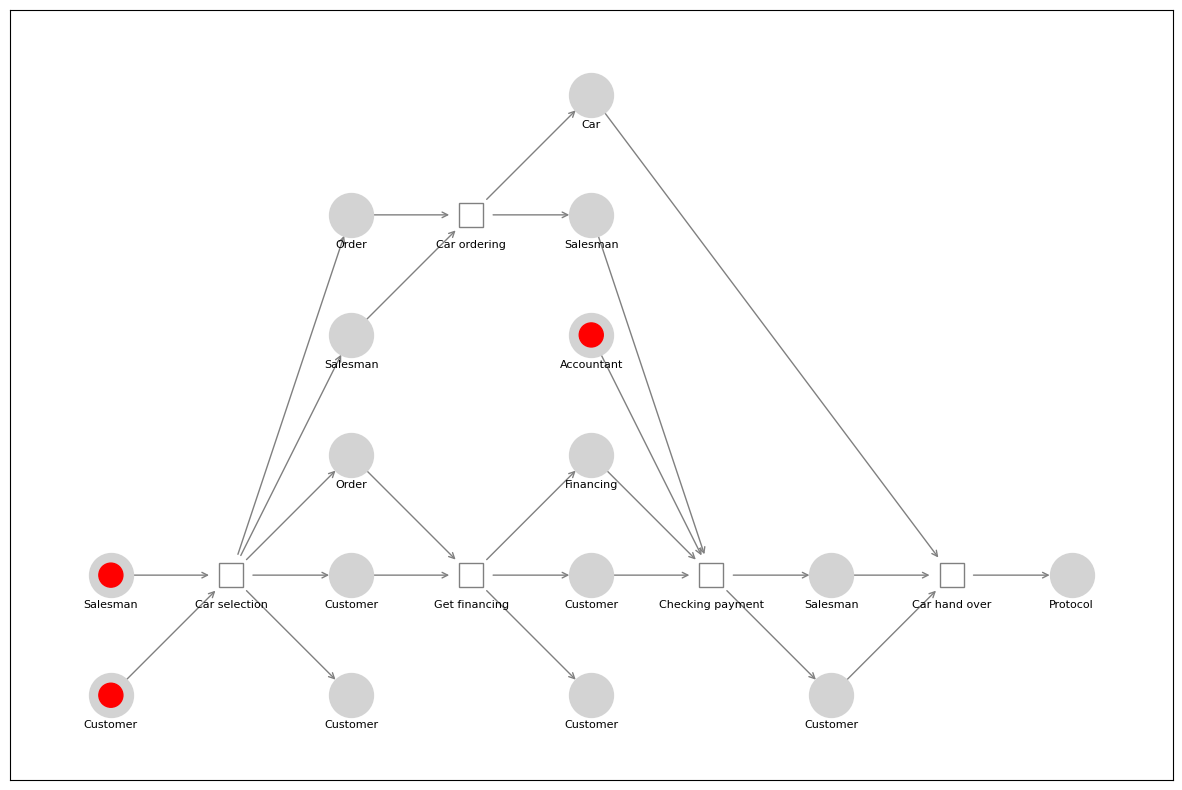

In [4]:
g_places = [GPlace(p00, 1, 1), GPlace(p10, 1, 2),
            GPlace(p01, 3, 2), GPlace(p20, 3, 3), GPlace(p11, 3, 4), GPlace(p21, 3, 5), GPlace(p04, 3, 1),
            GPlace(p02, 5, 2), GPlace(p50, 5, 3), GPlace(p40, 5, 4), GPlace(p12, 5, 5), GPlace(p60, 5, 6), GPlace(p05, 5, 1),
            GPlace(p03, 7, 1), GPlace(p13, 7, 2),
            GPlace(p70, 9, 2)]

g_transitions = [GTransition(car_selection, 2, 2),
                GTransition(get_financing, 4, 2),
                GTransition(car_ordering, 4, 5),
                GTransition(checking_payment, 6, 2),
                GTransition(car_hand_over, 8, 2)]

png = PetriNetGraph(g_places, g_transitions)
png.show_graph()

### Run the process using asynchronous Petri Net
step-by-step simulation

Transition Car selection started.
Transition Car selection finished after 2.97 seconds.
Transition result was True.
Transition Car ordering started.
Transition Get financing started.
Transition Get financing finished after 2.63 seconds.
Transition result was False.
Transition Car ordering finished after 2.67 seconds.
Transition result was True.


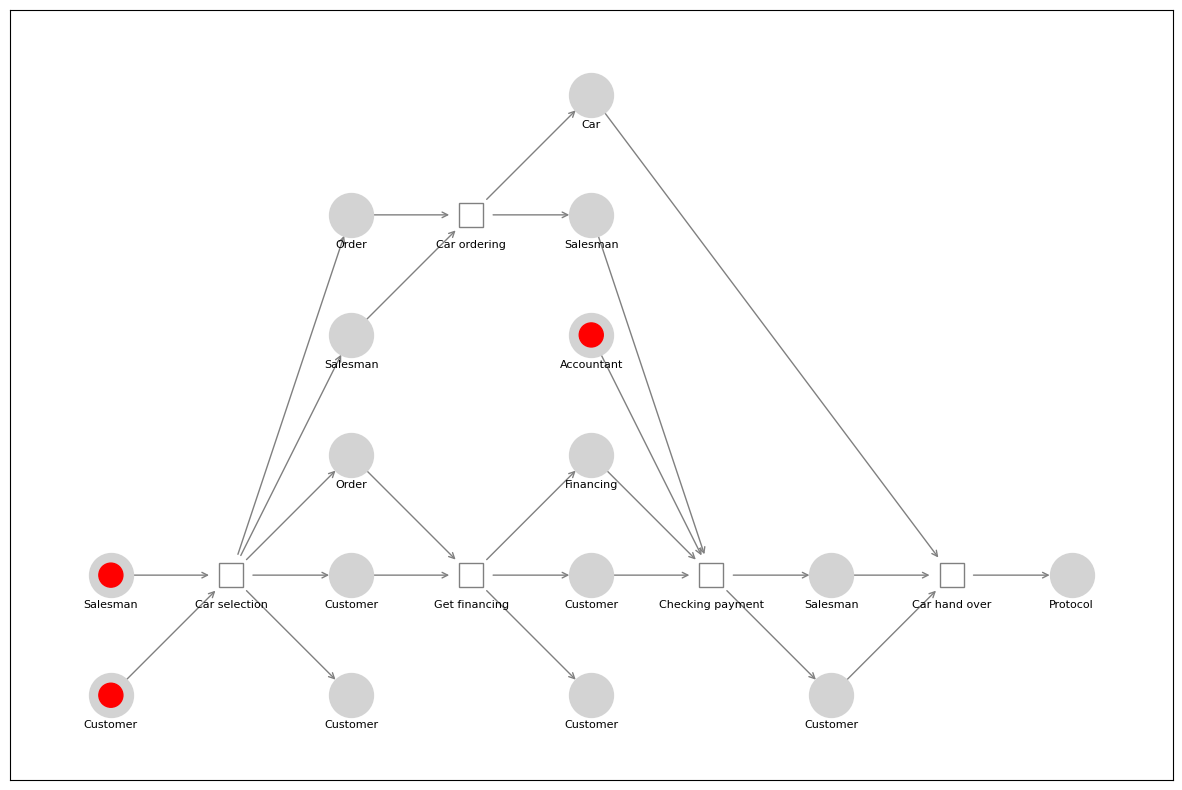

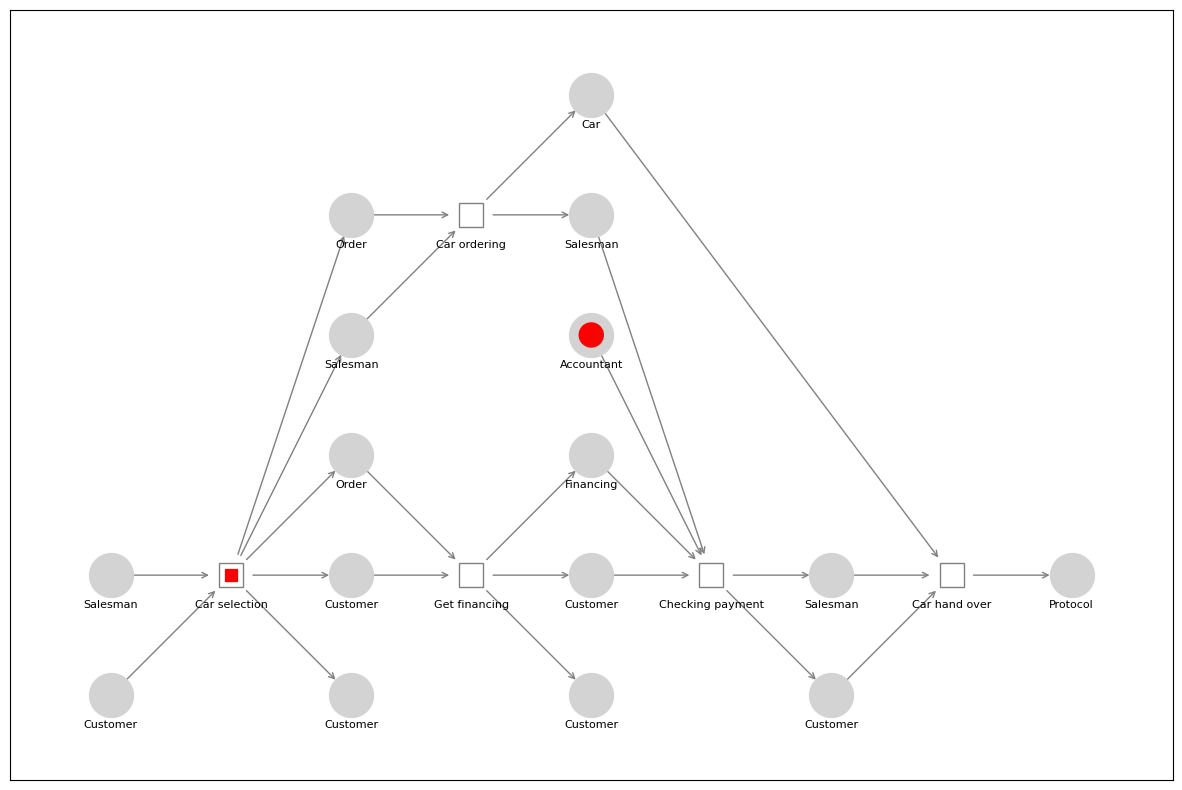

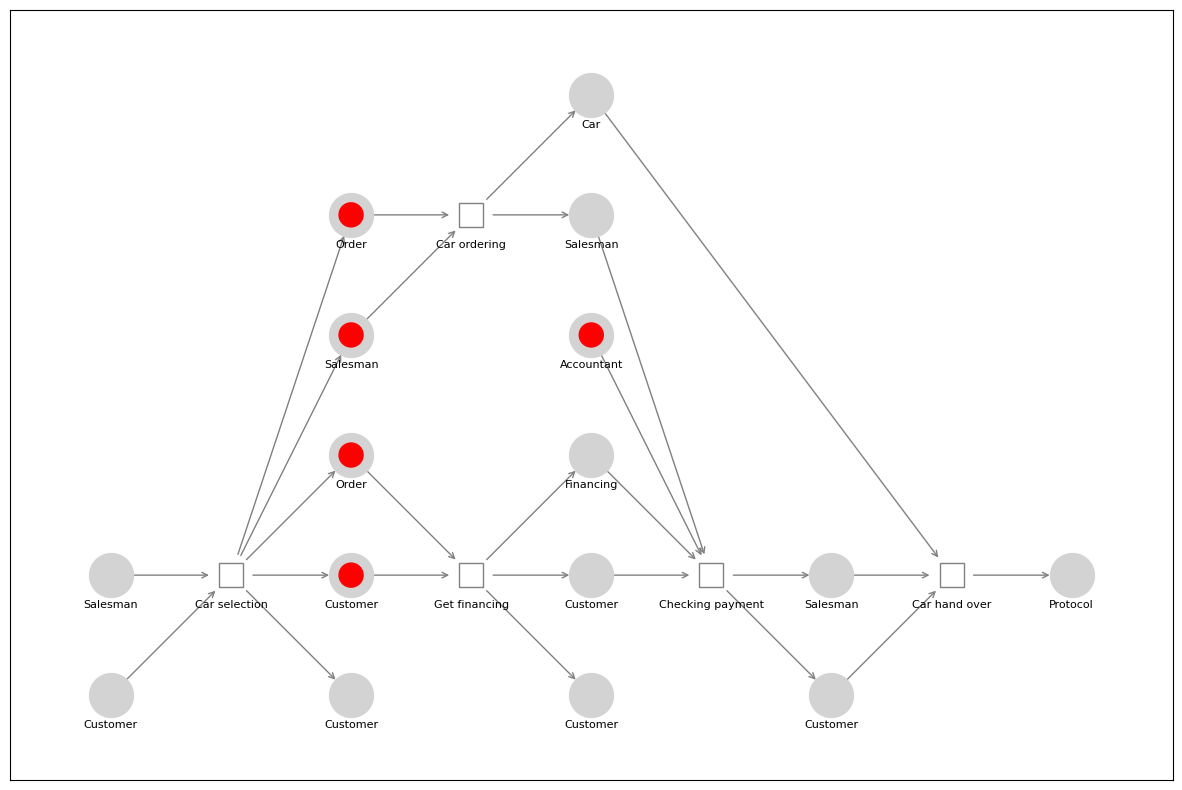

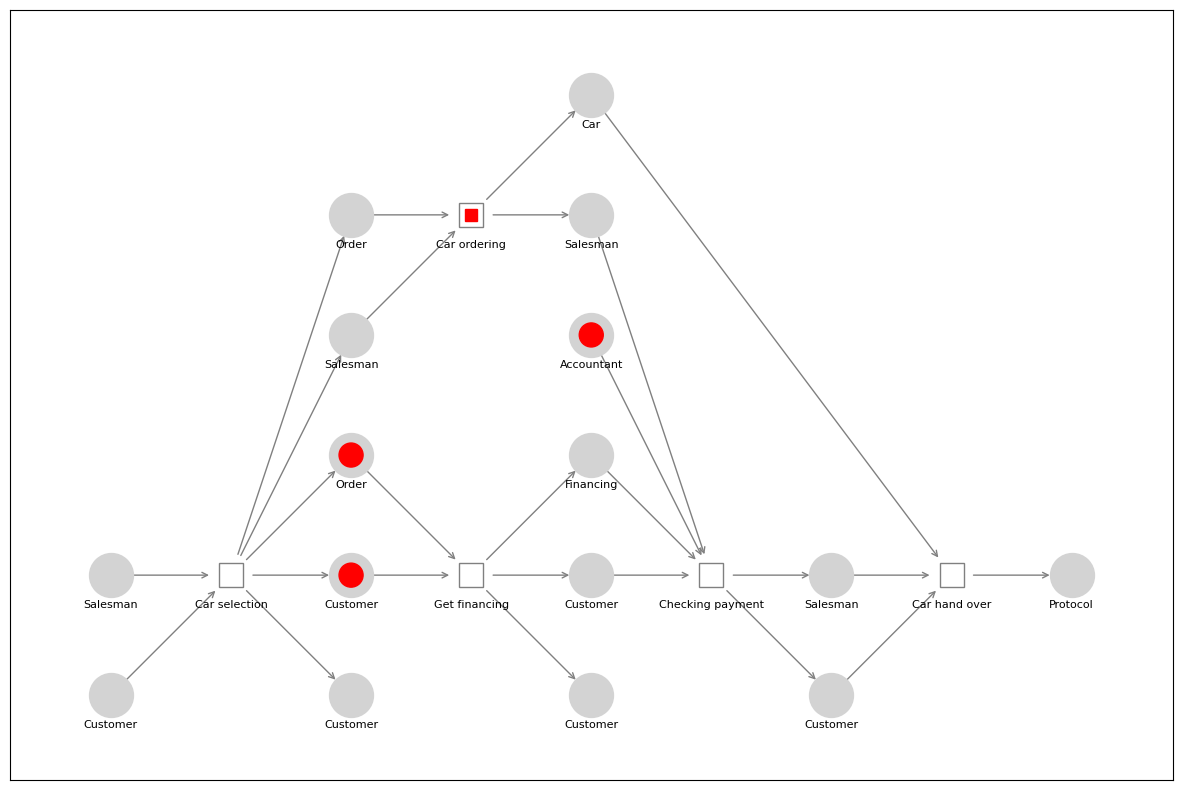

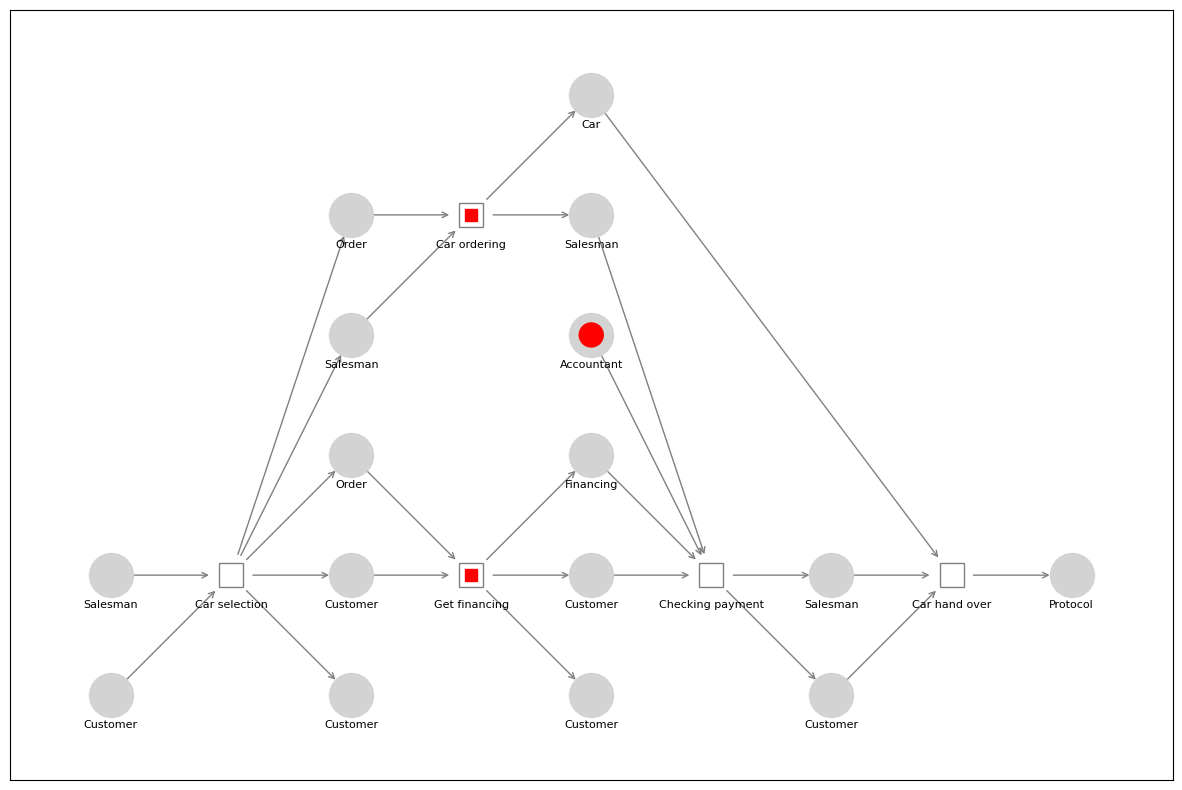

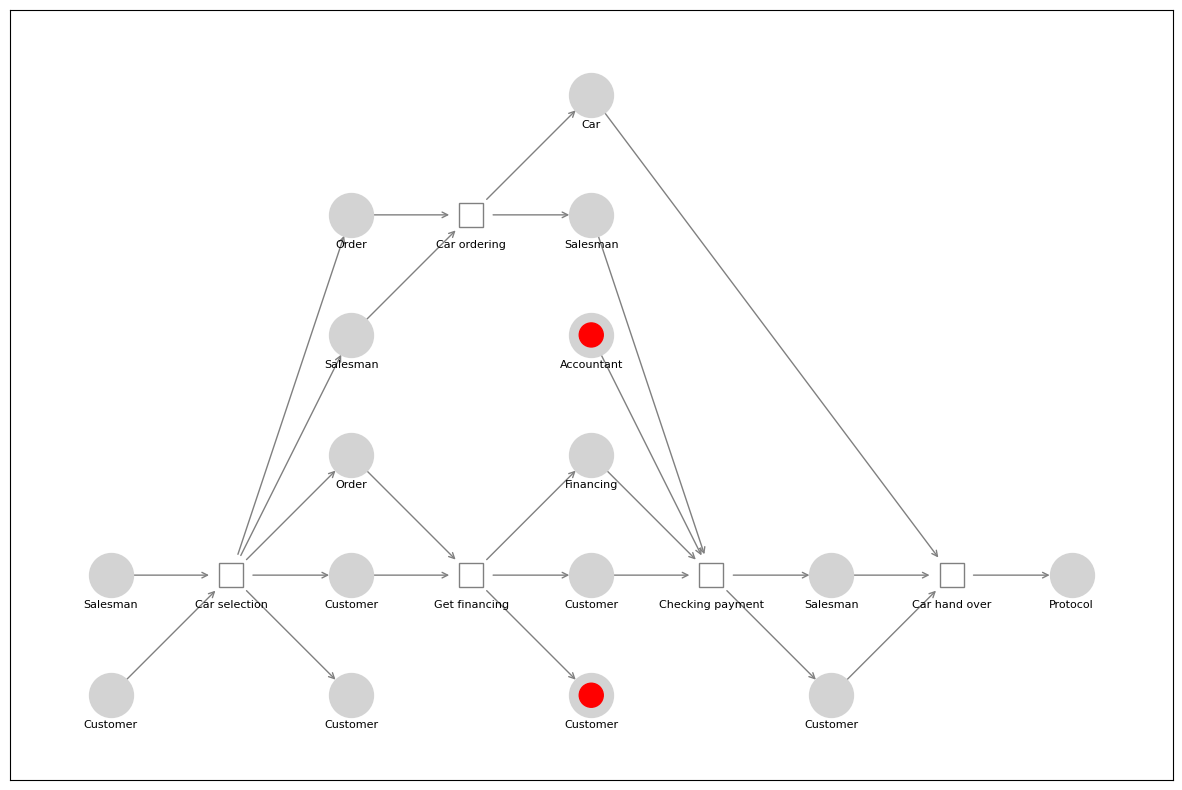

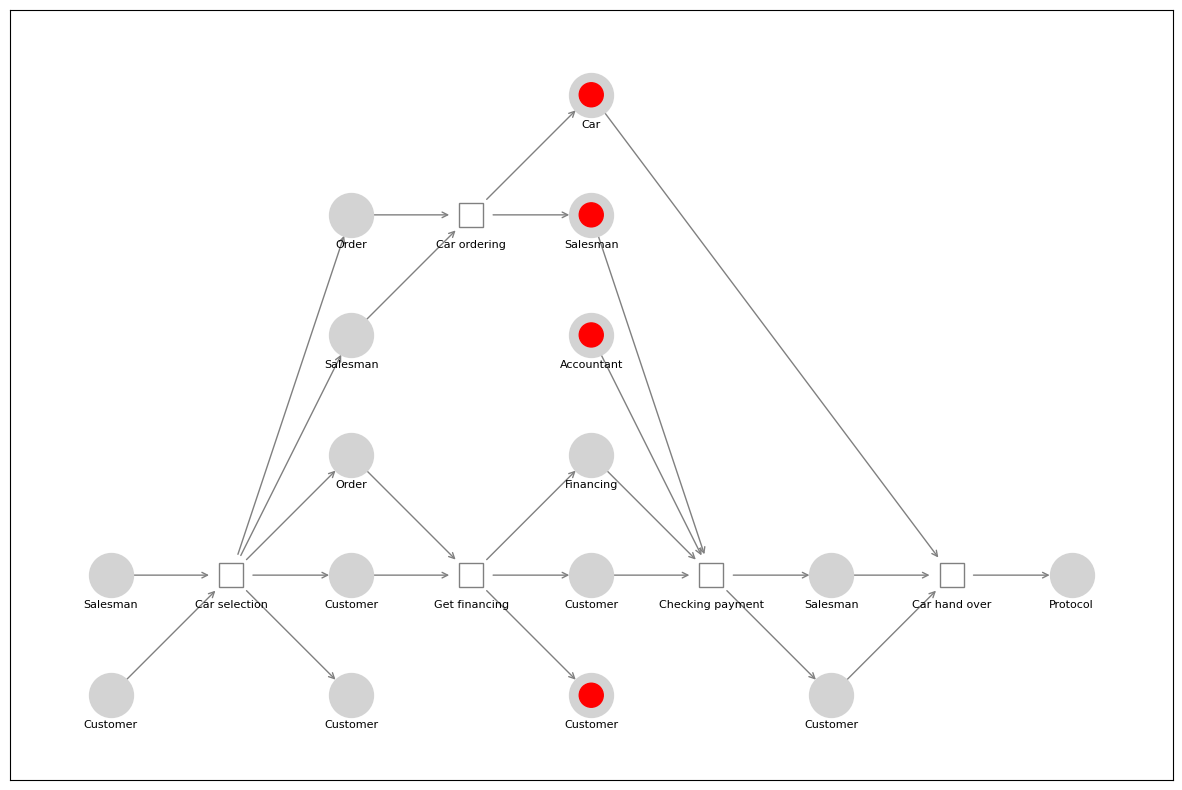

In [5]:

def show_state():
    #input("Press any key to continue ...")
    png.draw_graph()

pn.run(show_state)

### This is actual result in BPStudio application

![Process Diagram](PN2.png)

Reset Petri Net and run it continuously. 

Transition Car selection started.
Transition Car selection finished after 2.09 seconds.
Transition result was True.
Transition Car ordering started.
Transition Get financing started.
Transition Get financing finished after 1.11 seconds.
Transition result was True.
Transition Car ordering finished after 2.58 seconds.
Transition result was True.
Transition Checking payment started.
Transition Checking payment finished after 1.09 seconds.
Transition result was False.
Transition Car hand over started.
Transition Car hand over finished after 2.09 seconds.
Transition result was False.


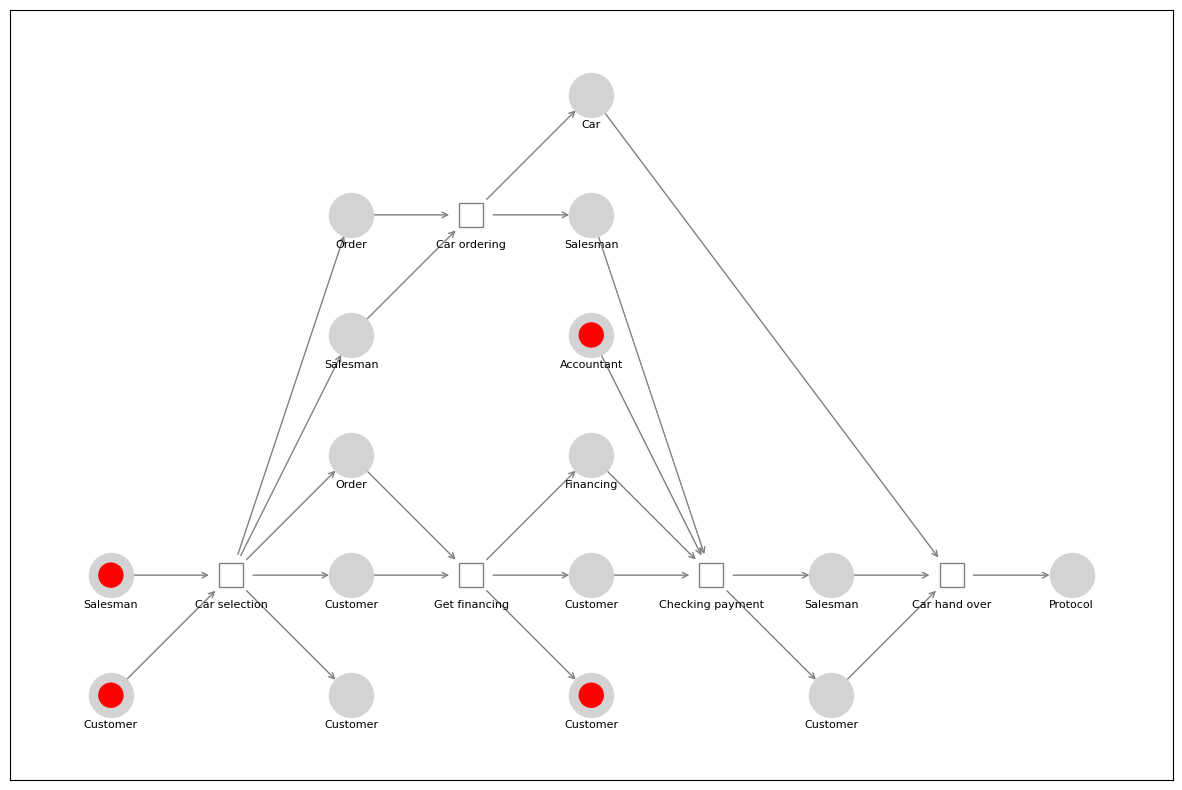

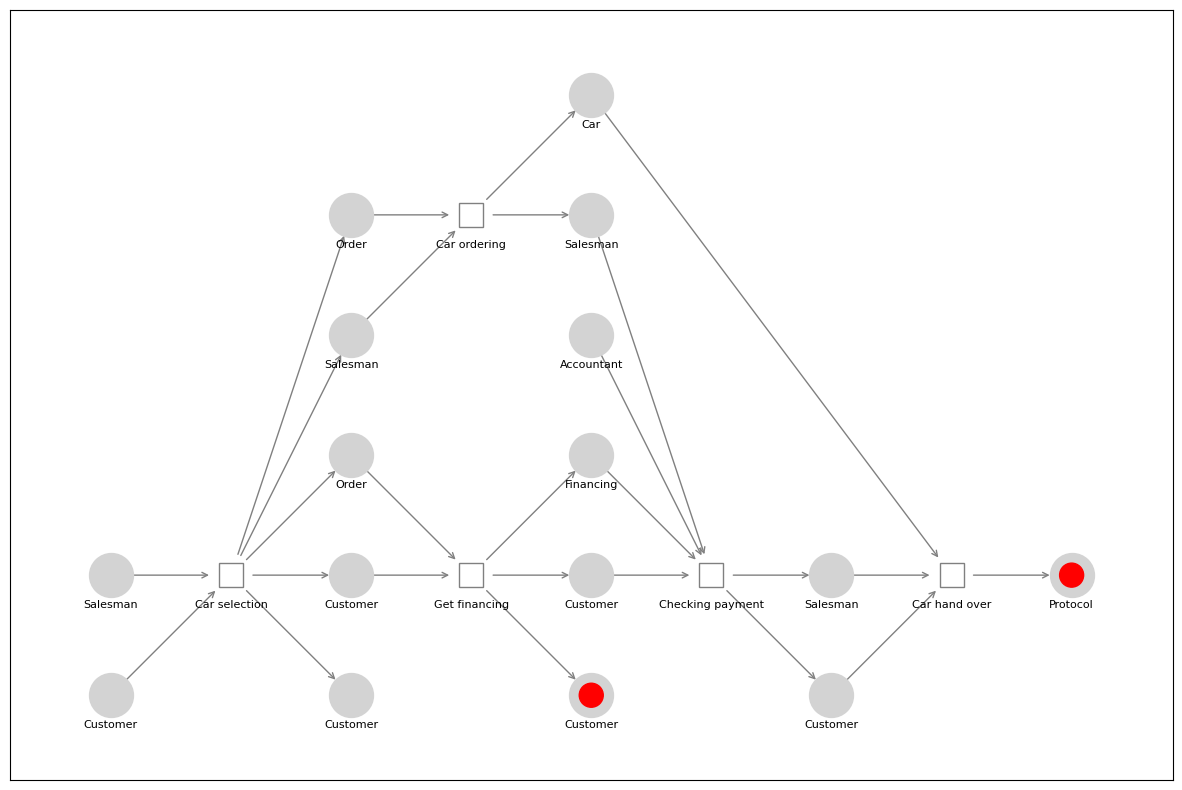

In [6]:
pn.reset()

p00.add_token()
p10.add_token()
p40.add_token()

png.draw_graph()
pn.run()
png.draw_graph()